## Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 


## Objective

To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.


## Data Description

The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below. 

**Data Dictionary** 

- S.No.: Serial number
- Name: Name of the car which includes brand name and model name
- Location: Location in which the car is being sold or is available for purchase (cities)
- Year: Manufacturing year of the car
- Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km
- Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car (Automatic/Manual)
- Owner: Type of ownership
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC
- Power: The maximum power of the engine in bhp
- Seats: The number of seats in the car
- New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh = 100,000 INR)
- Price: The price of the used car in INR Lakhs

In [1]:
# Loading the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings("ignore")

###  Load and Overview of Dataset

In [2]:
df=pd.read_csv(r'used_cars_data.csv')

In [3]:
used_cars=df.copy(deep=True)

In [4]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
df.sample(10,random_state=1)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47 Lakh,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44 Lakh,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,NaN,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,NaN,6.34
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05 Lakh,24.82
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,32.00
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,NaN,20.77
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,2.50
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.0,9.36 Lakh,8.20


### Shape of dataset 

In [6]:
df.shape

(7253, 14)

### Datatypes of columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


### Statistical Summary

In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253.0,NaN,NaN,NaN,3626.0,2093.905084,0.0,1813.0,3626.0,5439.0,7252.0
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking and Handling Null values

In [9]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [10]:
df.drop(['New_Price','S.No.'],axis=1,inplace=True)

In [11]:
df.dropna(subset=['Price'],axis=0,inplace=True)

In [12]:
df.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

In [13]:
#df.drop(['S.No.'],axis=1,inplace=True)

In [14]:
df.reset_index(drop=True,inplace=True)

In [15]:
df['Company']=df['Name'].apply(lambda x: x.split(' ')[0].title())

In [16]:
df.sample(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
5770,Mahindra XUV500 W6 2WD,Mumbai,2015,48000,Diesel,Manual,First,16.0 kmpl,2179 CC,140 bhp,7.0,9.45,Mahindra
4311,Mercedes-Benz E-Class 280 CDI,Pune,2009,100000,Diesel,Automatic,First,11.0 kmpl,2987 CC,198.5 bhp,5.0,11.50,Mercedes-Benz
668,Maruti Vitara Brezza ZDi Plus Dual Tone,Coimbatore,2017,18108,Diesel,Manual,First,24.3 kmpl,1248 CC,88.5 bhp,5.0,11.31,Maruti
3901,Toyota Corolla Altis 1.8 G CNG,Mumbai,2010,63000,CNG,Manual,Second,14.53 km/kg,1798 CC,138 bhp,5.0,3.35,Toyota
1884,Honda Jazz 1.2 VX i VTEC,Kochi,2017,24700,Petrol,Manual,First,18.7 kmpl,1199 CC,88.7 bhp,5.0,7.07,Honda
3242,Land Rover Range Rover Vogue SE 4.4 SDV8,Bangalore,2012,63000,Diesel,Automatic,Second,11.49 kmpl,4367 CC,335.3 bhp,5.0,65.00,Land
2353,Hyundai Xcent 1.2 Kappa S Option,Coimbatore,2016,21495,Petrol,Manual,First,19.1 kmpl,1197 CC,81.86 bhp,5.0,6.16,Hyundai
5814,Hyundai Grand i10 Magna,Pune,2015,21000,Petrol,Manual,First,18.9 kmpl,1197 CC,82 bhp,5.0,3.75,Hyundai
3186,Hyundai Grand i10 1.2 Kappa Asta,Coimbatore,2017,62788,Petrol,Manual,First,18.9 kmpl,1197 CC,81.86 bhp,5.0,6.08,Hyundai
1486,Volkswagen Jetta 2007-2011 1.9 Highline TDI,Bangalore,2009,74000,Diesel,Automatic,First,15.5 kmpl,1896 CC,105 bhp,5.0,5.25,Volkswagen


In [17]:
df.isnull().sum(axis=1).value_counts()

0    5872
1     107
3      36
2       4
dtype: int64

In [18]:
mis=df.isnull().sum(axis=1)
df[mis==3].sample(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,1.50,Honda
4152,Land Rover Range Rover 3.0 D,Mumbai,2003,75000,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,16.11,Land
3522,Hyundai Santro GLS II - Euro II,Kochi,2012,66400,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,2.66,Hyundai
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,1.85,Honda
2842,Hyundai Santro GLS II - Euro II,Bangalore,2012,43000,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,3.25,Hyundai
2325,Maruti Swift 1.3 VXI ABS,Pune,2015,67000,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,4.70,Maruti
2623,BMW 5 Series 520d Sedan,Pune,2012,95000,Diesel,Automatic,Second,18.48 kmpl,NaN,NaN,NaN,18.00,Bmw
2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,3.15,Hyundai
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN,3.20,Honda
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,5.80,Maruti


In [19]:
df['Name'][mis==3].unique()

array(['Honda City 1.5 GXI', 'Maruti Swift 1.3 VXi',
       'Land Rover Range Rover 3.0 D', 'Honda City 1.3 DX',
       'Maruti Swift 1.3 ZXI',
       'Land Rover Range Rover Sport 2005 2012 Sport',
       'Maruti Swift 1.3 LXI', 'Hyundai Santro LP zipPlus',
       'Toyota Etios Liva V', 'Maruti Swift 1.3 VXI ABS',
       'BMW 5 Series 520d Sedan', 'Hyundai Santro GLS II - Euro II',
       'Maruti Wagon R Vx', 'Honda CR-V AT With Sun Roof',
       'Fiat Punto 1.3 Emotion', 'Hyundai Santro Xing XG',
       'Honda Jazz Select Edition', 'Fiat Punto 1.2 Dynamic',
       'Fiat Punto 1.4 Emotion'], dtype=object)

In [20]:
df[df['Name']=='Maruti Swift 1.3 VXi']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,2.11,Maruti
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,1.75,Maruti
2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,Second,16.1 kmpl,NaN,NaN,NaN,1.75,Maruti
2668,Maruti Swift 1.3 VXi,Kolkata,2014,32986,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,4.24,Maruti
3404,Maruti Swift 1.3 VXi,Jaipur,2006,125000,Petrol,Manual,Fourth & Above,16.1 kmpl,NaN,NaN,NaN,2.35,Maruti
5015,Maruti Swift 1.3 VXi,Delhi,2006,63000,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,1.60,Maruti


In [21]:
df[df['Name']=='Honda City 1.5 GXI']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,2.95,Honda
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,1.50,Honda
3305,Honda City 1.5 GXI,Jaipur,2007,75055,Petrol,Manual,First,12.8 kmpl,1493 CC,100 bhp,5.0,2.30,Honda
4767,Honda City 1.5 GXI,Mumbai,2005,81000,Petrol,Manual,Second,12.8 kmpl,1493 CC,100 bhp,5.0,1.10,Honda
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,1.85,Honda


In [22]:
df[df['Name']=='Land Rover Range Rover 3.0 D']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,26.50,Land
4152,Land Rover Range Rover 3.0 D,Mumbai,2003,75000,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,16.11,Land


In [23]:
df['Name'][mis==2].unique()

array(['Maruti Estilo LXI', 'Ford Endeavour Hurricane LE'], dtype=object)

In [24]:
df[df['Name']=='Maruti Estilo LXI']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.5 kmpl,1061 CC,NaN,NaN,1.50,Maruti
3882,Maruti Estilo LXI,Kolkata,2010,40000,Petrol,Manual,Second,19.5 kmpl,1061 CC,NaN,NaN,2.50,Maruti
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5 kmpl,1061 CC,NaN,NaN,1.75,Maruti


In [25]:
for i in df['Name'][mis==3].unique():
    l={}
    l['Car']=i
    l['Engine']=df['Engine'][df['Name']==i].unique()
    l['Power']=df['Power'][df['Name']==i].unique()
    l['Seats']=df['Seats'][df['Name']==i].unique()
    print(l)
    

{'Car': 'Honda City 1.5 GXI', 'Engine': array([nan, '1493 CC'], dtype=object), 'Power': array([nan, '100 bhp'], dtype=object), 'Seats': array([nan,  5.])}
{'Car': 'Maruti Swift 1.3 VXi', 'Engine': array([nan], dtype=object), 'Power': array([nan], dtype=object), 'Seats': array([nan])}
{'Car': 'Land Rover Range Rover 3.0 D', 'Engine': array([nan], dtype=object), 'Power': array([nan], dtype=object), 'Seats': array([nan])}
{'Car': 'Honda City 1.3 DX', 'Engine': array([nan], dtype=object), 'Power': array([nan], dtype=object), 'Seats': array([nan])}
{'Car': 'Maruti Swift 1.3 ZXI', 'Engine': array([nan], dtype=object), 'Power': array([nan], dtype=object), 'Seats': array([nan])}
{'Car': 'Land Rover Range Rover Sport 2005 2012 Sport', 'Engine': array([nan], dtype=object), 'Power': array([nan], dtype=object), 'Seats': array([nan])}
{'Car': 'Maruti Swift 1.3 LXI', 'Engine': array([nan], dtype=object), 'Power': array([nan], dtype=object), 'Seats': array([nan])}
{'Car': 'Hyundai Santro LP zipPlus',

In [26]:
for i in df['Name'][mis==1].unique():
    l={}
    l['Car']=i
    l['Engine']=df['Engine'][df['Name']==i].unique()
    l['Power']=df['Power'][df['Name']==i].unique()
    l['Seats']=df['Seats'][df['Name']==i].unique()
    print(l)
    

{'Car': 'Ford Fiesta 1.4 SXi TDCi', 'Engine': array(['1399 CC'], dtype=object), 'Power': array([nan], dtype=object), 'Seats': array([5.])}
{'Car': 'Hyundai Santro Xing XL', 'Engine': array(['1086 CC'], dtype=object), 'Power': array([nan], dtype=object), 'Seats': array([5.])}
{'Car': 'Hyundai Santro Xing XO', 'Engine': array(['1086 CC'], dtype=object), 'Power': array([nan], dtype=object), 'Seats': array([5.])}
{'Car': 'Hyundai Santro Xing XL eRLX Euro III', 'Engine': array(['1086 CC'], dtype=object), 'Power': array([nan], dtype=object), 'Seats': array([5.])}
{'Car': 'Hyundai Santro Xing XO eRLX Euro II', 'Engine': array(['1086 CC'], dtype=object), 'Power': array([nan], dtype=object), 'Seats': array([5.])}
{'Car': 'Maruti Swift VDI BSIV', 'Engine': array(['1248 CC'], dtype=object), 'Power': array(['74 bhp', nan], dtype=object), 'Seats': array([5.])}
{'Car': 'Ford Figo Diesel', 'Engine': array(['1498 CC'], dtype=object), 'Power': array(['99 bhp'], dtype=object), 'Seats': array([nan])}
{'C

In [27]:
for i in df['Name'][mis==2].unique():
    l={}
    l['Car']=i
    l['Engine']=df['Engine'][df['Name']==i].unique()
    l['Power']=df['Power'][df['Name']==i].unique()
    l['Seats']=df['Seats'][df['Name']==i].unique()
    print(l)
    

{'Car': 'Maruti Estilo LXI', 'Engine': array(['1061 CC'], dtype=object), 'Power': array([nan], dtype=object), 'Seats': array([nan])}
{'Car': 'Ford Endeavour Hurricane LE', 'Engine': array(['2953 CC'], dtype=object), 'Power': array([nan], dtype=object), 'Seats': array([nan])}


In [28]:
def fill(df,Car,Engine=None,Power=None,Seats=None):
    df['Power'][df['Name']==Car]=Power    
    df['Engine'][df['Name']==Car]=Engine
    df['Seats'][df['Name']==Car]=Seats

In [29]:
# The values of power, engine and seats for missing values are collected from internet

dic={'Honda City 1.5 GXI':['1493 CC','100 bph','5'],
     'Maruti Swift 1.3 VXi':['1298 CC','87 bph','5'],
     'Land Rover Range Rover 3.0 D':['2993 CC','296 bph','5'],
     'Maruti Swift 1.3 ZXI':['1197 CC','83 bhp','5'],
     'Land Rover Range Rover Sport 2005 2012 Sport':['2993 CC','241 bhp','5'],
     'Maruti Swift 1.3 LXI':['1298 CC','87 bhp','5'],
     'Hyundai Santro LP zipPlus':['999 CC','62 bph','5'],
     'Toyota Etios Liva V':['1197 CC','80 bph','5'],
     'Maruti Swift 1.3 VXI ABS':['1197 CC','83 bph','5'],
     'BMW 5 Series 520d Sedan':['1995 CC','188 bph','5'],
     'Hyundai Santro GLS II - Euro II':['999 CC','62 bph','5'],
     'Maruti Wagon R Vx':['998 CC','66 bph','5'],
     'Fiat Punto 1.3 Emotion':['1248 CC','91 bph','5'],
     'Honda Jazz Select Edition':['1198 CC','88.8 bph','5'],
     'Fiat Punto 1.2 Dynamic':['1172 CC','67.1 bph','5'],
     'Fiat Punto 1.4 Emotion':['1368 CC','88.8 bph','5']}

In [30]:
for k,v in dic.items():
    fill(df,k,Engine=v[0],Power=v[1],Seats=v[2])

In [31]:
fill(df,'Maruti Estilo LXI',Power='67 bhp',Seats='5',Engine='998 cc')

In [32]:
fill(df,'Ford Endeavour Hurricane LE',Engine='2953 cc',Power='156 bhp',Seats='7')

In [33]:
df.isnull().sum(axis=1).value_counts()

0    5908
1     107
3       4
dtype: int64

In [34]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi


In [35]:
Mil=[]
for i in df['Mileage']:
    if str(i).endswith('km/kg'):
        i=i.replace(' km/kg','')
        i=np.round((float(i)*1.4),2)
        Mil.append(float(i))
    elif str(i).endswith('kmpl'):
        i=i.replace(' kmpl','')
        Mil.append(np.round(float(i),2))
    else:
        Mil.append(i)


In [36]:
len(Mil)

6019

In [37]:
df['New_mil']=Mil
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,New_mil
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti,37.24
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,19.67
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,18.20
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,20.77
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,15.20


In [38]:
df.dropna(axis=0,inplace=True)

In [39]:
eng=[]
for i in df['Engine']:
    if str(i).upper().endswith('CC'):
        i=i.upper().replace(' CC','')
        eng.append(float(i))
df['Engine']=eng
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,New_mil
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16 bhp,5.0,1.75,Maruti,37.24
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.2 bhp,5.0,12.50,Hyundai,19.67
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.7 bhp,5.0,4.50,Honda,18.20
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76 bhp,7.0,6.00,Maruti,20.77
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.8 bhp,5.0,17.74,Audi,15.20


In [40]:
po=[]
for i in df['Power']:
    i=i.split(' ')[0]
    po.append(float(i))
df['Power']=po
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,New_mil
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16,5.0,1.75,Maruti,37.24
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,12.50,Hyundai,19.67
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.70,5.0,4.50,Honda,18.20
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248.0,88.76,7.0,6.00,Maruti,20.77
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968.0,140.80,5.0,17.74,Audi,15.20


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5908 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5908 non-null   object 
 1   Location           5908 non-null   object 
 2   Year               5908 non-null   int64  
 3   Kilometers_Driven  5908 non-null   int64  
 4   Fuel_Type          5908 non-null   object 
 5   Transmission       5908 non-null   object 
 6   Owner_Type         5908 non-null   object 
 7   Mileage            5908 non-null   object 
 8   Engine             5908 non-null   float64
 9   Power              5908 non-null   float64
 10  Seats              5908 non-null   object 
 11  Price              5908 non-null   float64
 12  Company            5908 non-null   object 
 13  New_mil            5908 non-null   float64
dtypes: float64(4), int64(2), object(8)
memory usage: 692.3+ KB


In [42]:
df['Seats']=df['Seats'].astype('float')

In [43]:
df[['Location', 'Year', 'Fuel_Type', 'Transmission','Owner_Type', 'Seats', 'Company']]=df[['Location', 'Year', 'Fuel_Type', 'Transmission','Owner_Type', 'Seats', 'Company']].astype(dtype='category')

In [44]:
df['Name'][df['New_mil']==0].unique()

array(['Land Rover Freelander 2 TD4 SE',
       'Mercedes-Benz C-Class Progressive C 220d', 'Honda City 1.5 GXI',
       'Mercedes-Benz New C-Class Progressive C 200',
       'Mercedes-Benz M-Class ML 350 4Matic',
       'Land Rover Range Rover 3.0 D', 'Hyundai Santro Xing GL',
       'Land Rover Freelander 2 TD4 S',
       'Land Rover Range Rover Sport 2005 2012 Sport',
       'Hyundai Santro LP zipPlus', 'Hyundai Santro GLS II - Euro II',
       'Skoda Superb 3.6 V6 FSI', 'Audi A7 2011-2015 Sportback',
       'Land Rover Freelander 2 TD4 HSE'], dtype=object)

In [45]:
for i in df['Name'][df['New_mil']==0].unique():
    l={}
    l['Car']=i
    l['New_mil']=df['New_mil'][df['Name']==i].unique()
    print(l)

{'Car': 'Land Rover Freelander 2 TD4 SE', 'New_mil': array([0.])}
{'Car': 'Mercedes-Benz C-Class Progressive C 220d', 'New_mil': array([0.])}
{'Car': 'Honda City 1.5 GXI', 'New_mil': array([ 0. , 12.8])}
{'Car': 'Mercedes-Benz New C-Class Progressive C 200', 'New_mil': array([0.])}
{'Car': 'Mercedes-Benz M-Class ML 350 4Matic', 'New_mil': array([0.])}
{'Car': 'Land Rover Range Rover 3.0 D', 'New_mil': array([0.])}
{'Car': 'Hyundai Santro Xing GL', 'New_mil': array([0.])}
{'Car': 'Land Rover Freelander 2 TD4 S', 'New_mil': array([0.])}
{'Car': 'Land Rover Range Rover Sport 2005 2012 Sport', 'New_mil': array([0.])}
{'Car': 'Hyundai Santro LP zipPlus', 'New_mil': array([0.])}
{'Car': 'Hyundai Santro GLS II - Euro II', 'New_mil': array([0.])}
{'Car': 'Skoda Superb 3.6 V6 FSI', 'New_mil': array([0.])}
{'Car': 'Audi A7 2011-2015 Sportback', 'New_mil': array([0.])}
{'Car': 'Land Rover Freelander 2 TD4 HSE', 'New_mil': array([0.])}


In [46]:
df['New_mil'][df['Name']=='Honda City 1.5 GXI']=12.8

In [47]:
df.drop(df[df['New_mil']==0].index,axis=0,inplace=True)

In [48]:
df.drop(['Mileage','Name'],axis=1,inplace=True)

In [49]:
df.reset_index(drop=True,inplace=True)

In [50]:
df['Year']=df['Year'].apply(lambda x: float(2021-float(x)))

In [51]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,Company,New_mil
0,Mumbai,11.0,72000,CNG,Manual,First,998.0,58.16,5.0,1.75,Maruti,37.24
1,Pune,6.0,41000,Diesel,Manual,First,1582.0,126.20,5.0,12.50,Hyundai,19.67
2,Chennai,10.0,46000,Petrol,Manual,First,1199.0,88.70,5.0,4.50,Honda,18.20
3,Chennai,9.0,87000,Diesel,Manual,First,1248.0,88.76,7.0,6.00,Maruti,20.77
4,Coimbatore,8.0,40670,Diesel,Automatic,Second,1968.0,140.80,5.0,17.74,Audi,15.20


### Univariate analysis

In [52]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=45, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

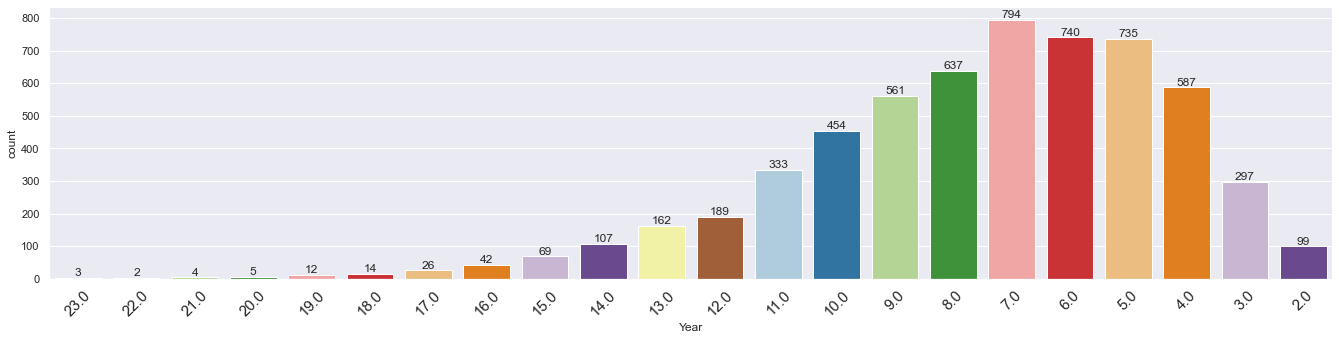

In [53]:
labeled_barplot(df,'Year')

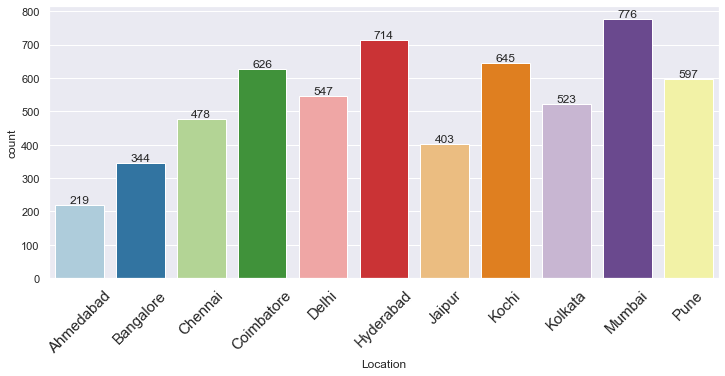

In [54]:
labeled_barplot(df,'Location')

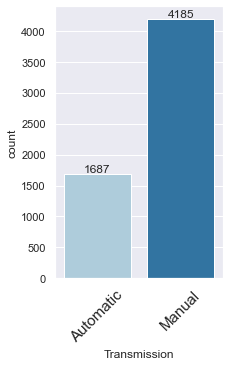

In [55]:
labeled_barplot(df,'Transmission')

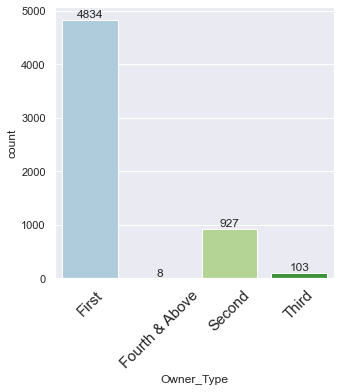

In [56]:
labeled_barplot(df,'Owner_Type')

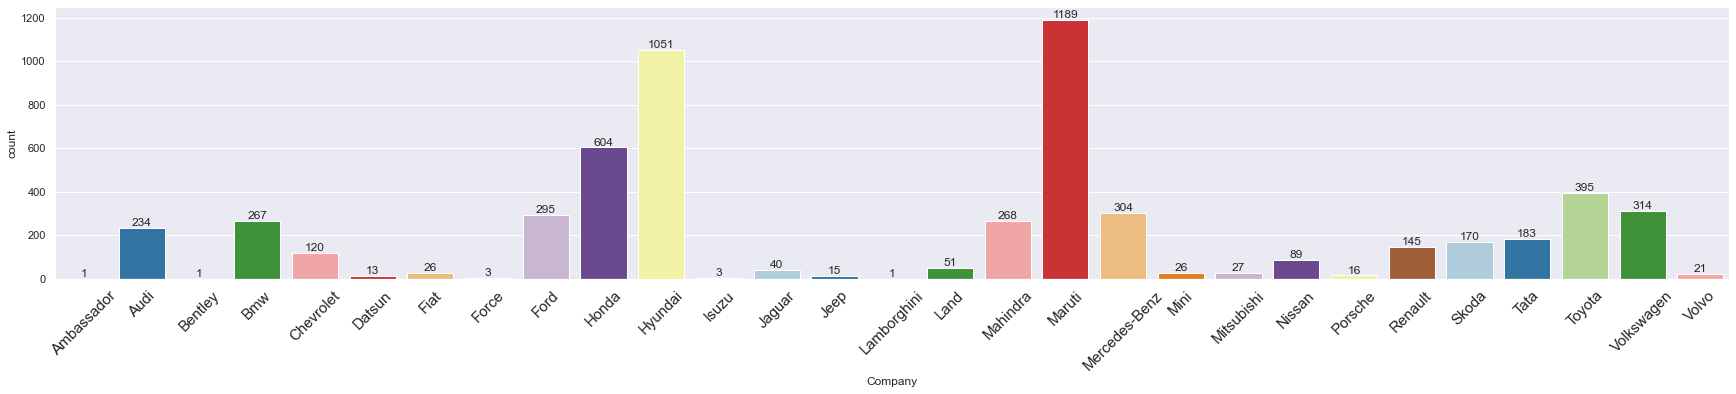

In [57]:
labeled_barplot(df,'Company')

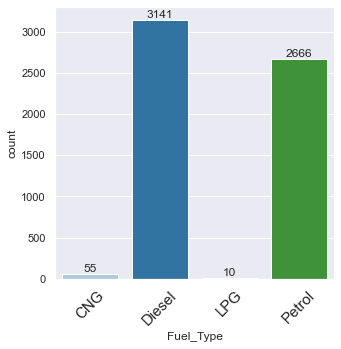

In [58]:
labeled_barplot(df,'Fuel_Type')

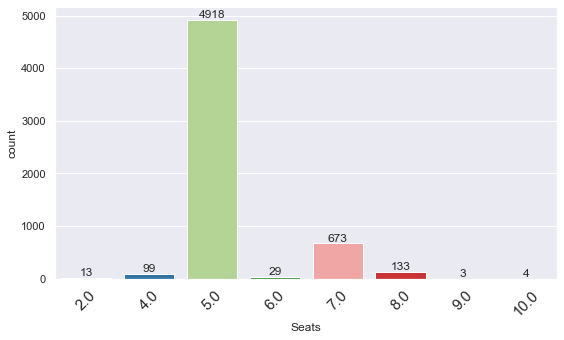

In [59]:
labeled_barplot(df,'Seats')

<AxesSubplot:xlabel='Power', ylabel='Density'>

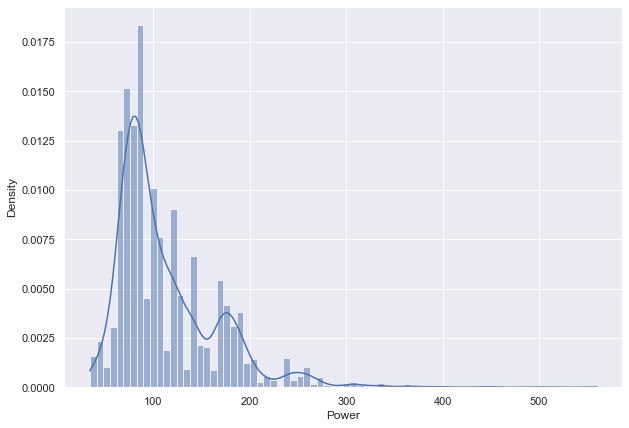

In [60]:
plt.figure(figsize=(10,7))
sns.histplot(data=df,x='Power',stat='density',kde=True)

<AxesSubplot:xlabel='Power'>

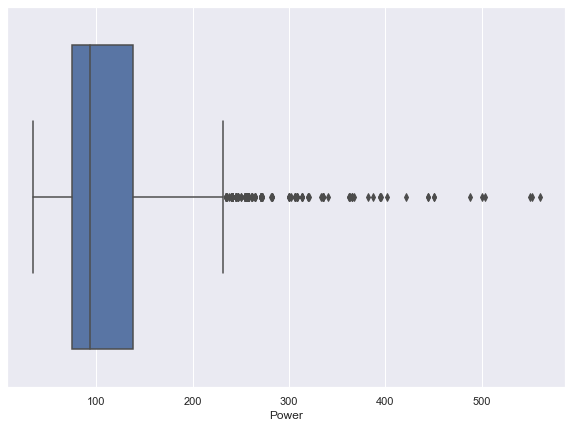

In [61]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x='Power')

<AxesSubplot:xlabel='Engine', ylabel='Density'>

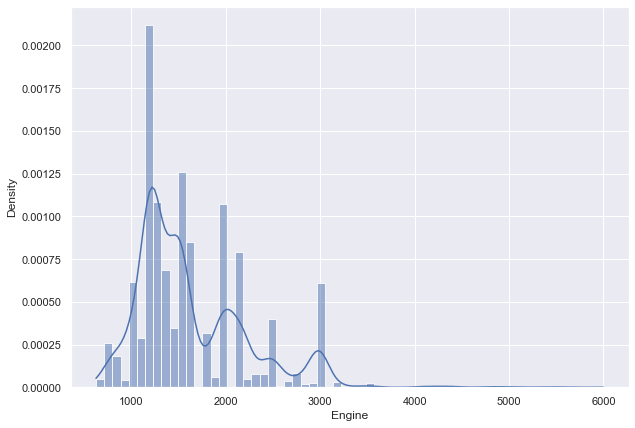

In [62]:
plt.figure(figsize=(10,7))
sns.histplot(data=df,x='Engine',stat='density',kde=True)

<AxesSubplot:xlabel='Engine'>

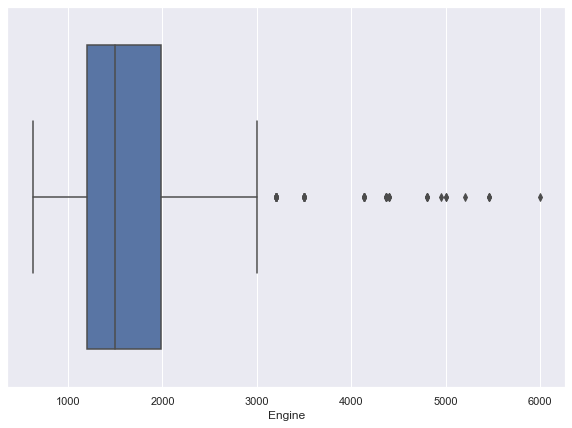

In [63]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x='Engine')

<AxesSubplot:xlabel='New_mil', ylabel='Count'>

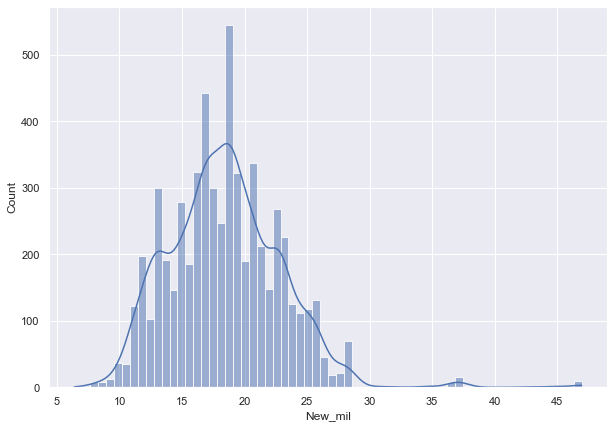

In [64]:
plt.figure(figsize=(10,7))
sns.histplot(data=df,x='New_mil',kde=True)

<AxesSubplot:xlabel='New_mil'>

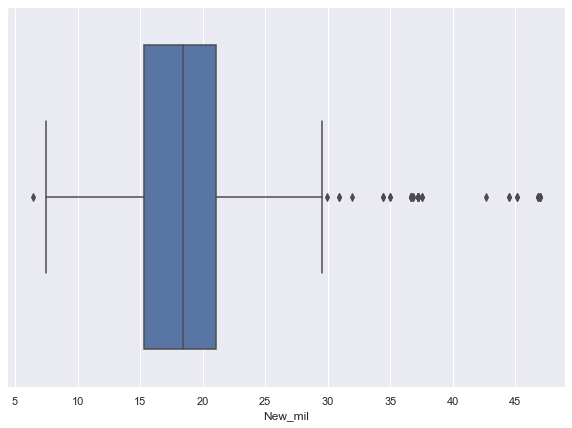

In [65]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x='New_mil')

<AxesSubplot:xlabel='Kilometers_Driven', ylabel='Count'>

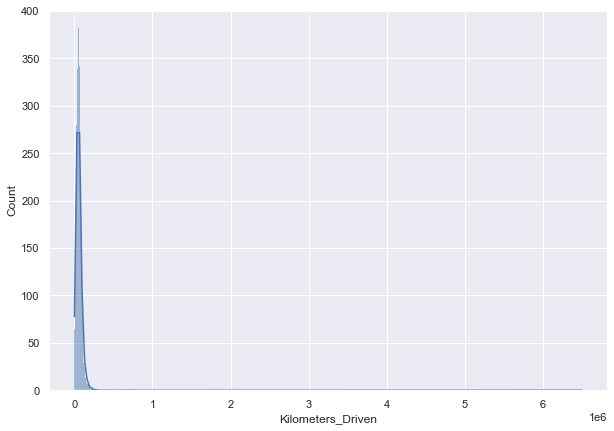

In [66]:
plt.figure(figsize=(10,7))
sns.histplot(data=df,x='Kilometers_Driven',kde=True)

<AxesSubplot:xlabel='Kilometers_Driven'>

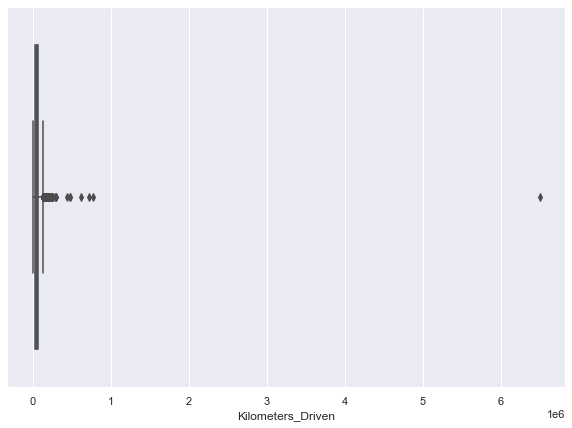

In [67]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x='Kilometers_Driven')

In [68]:
df[df['Kilometers_Driven']>1000000]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,Company,New_mil
2266,Chennai,4.0,6500000,Diesel,Automatic,First,2993.0,258.0,5.0,65.0,Bmw,15.97


In [69]:
df.drop(df[df['Kilometers_Driven']>1000000].index,axis=0,inplace=True)

In [70]:
df.reset_index(drop=True,inplace=True)

<AxesSubplot:xlabel='Kilometers_Driven'>

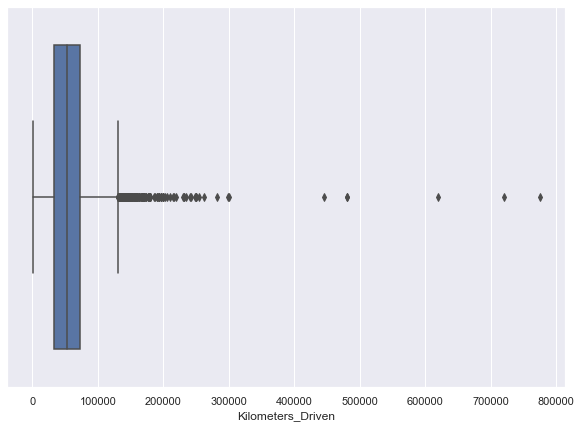

In [71]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x='Kilometers_Driven')

<AxesSubplot:xlabel='Kilometers_Driven', ylabel='Count'>

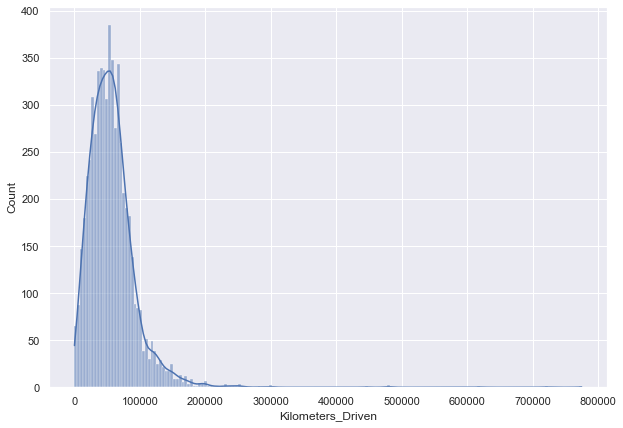

In [72]:
plt.figure(figsize=(10,7))
sns.histplot(data=df,x='Kilometers_Driven',kde=True)

<AxesSubplot:xlabel='Price', ylabel='Density'>

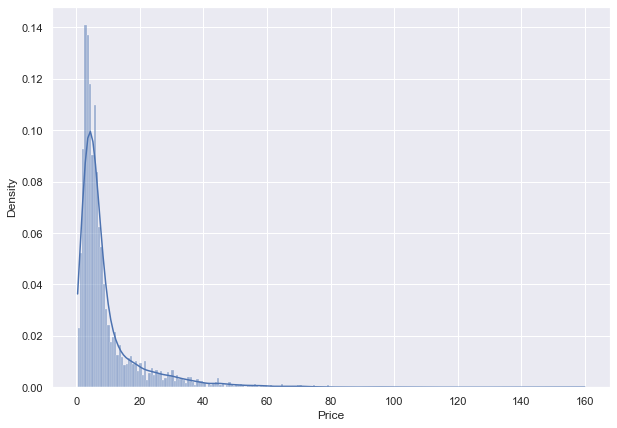

In [73]:
plt.figure(figsize=(10,7))
sns.histplot(data=df,x='Price',kde=True,stat='density')

<AxesSubplot:xlabel='Price'>

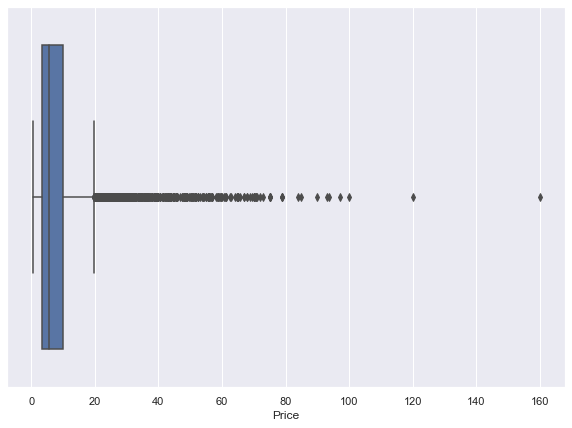

In [74]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x='Price')

In [75]:
#df.columns
col=['Location', 'Year', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Seats', 'Company']

In [76]:
def hisplt(df,label):
    for i in col:
        plt.figure(figsize=(10,7))
        sns.histplot(data=df,x=label,hue=i)
        plt.show()

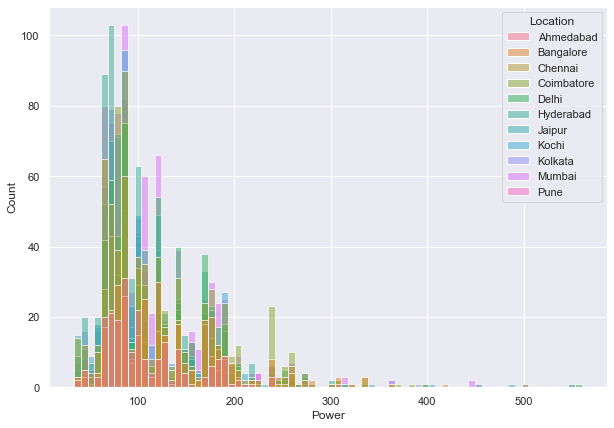

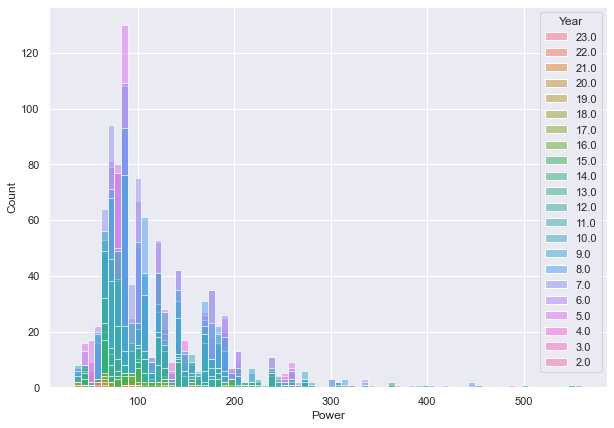

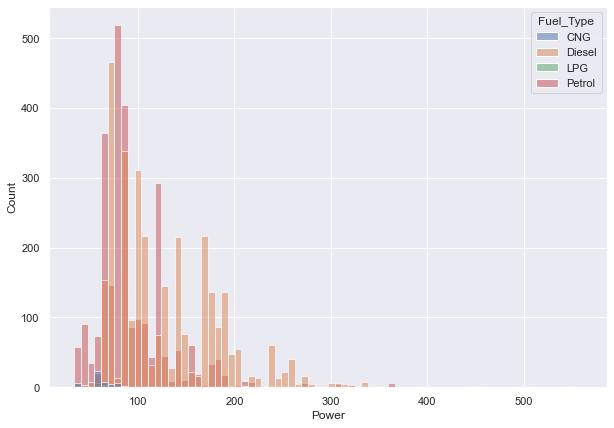

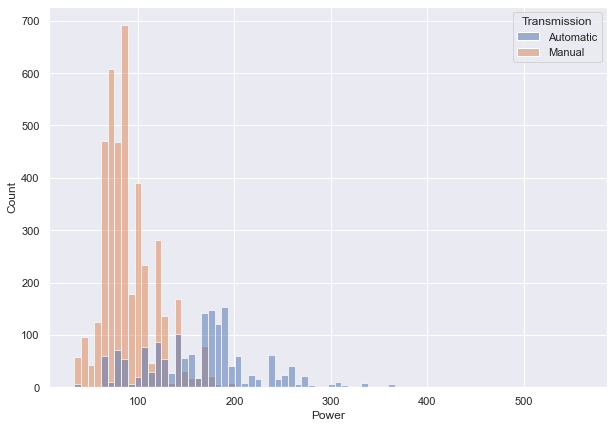

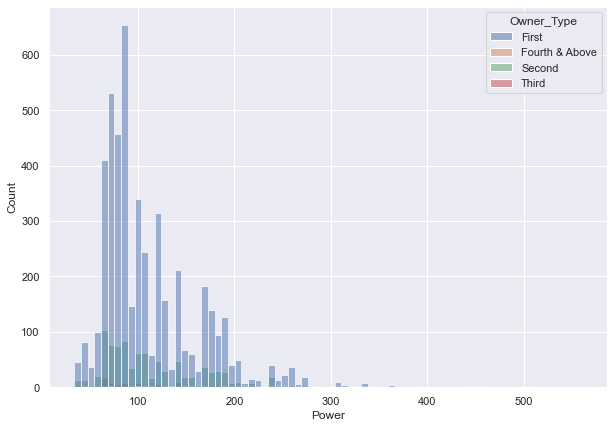

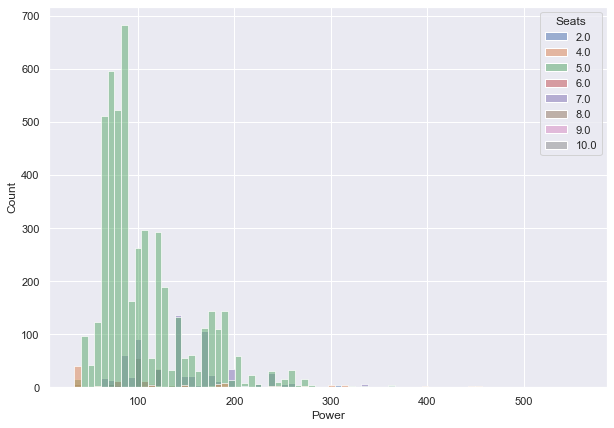

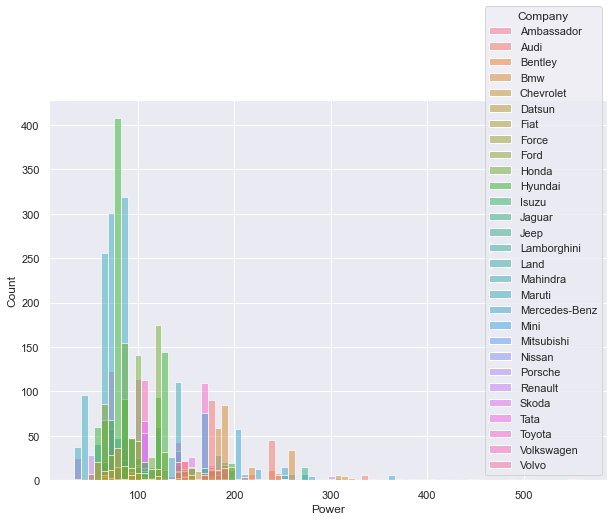

In [77]:
hisplt(df,'Power')

In [78]:
df['Kilometers_Driven'].groupby(by=df['Company']).sum()

Company
Ambassador          80000
Audi             12401913
Bentley             48000
Bmw              14723660
Chevrolet         7477777
Datsun             250118
Fiat              1764326
Force              132000
Ford             18534533
Honda            33178893
Hyundai          52707112
Isuzu               79851
Jaguar            1455229
Jeep               416997
Lamborghini          6500
Land              2806859
Mahindra         18628873
Maruti           63478803
Mercedes-Benz    14845982
Mini               647148
Mitsubishi        2220767
Nissan            5785880
Porsche            702842
Renault           7668894
Skoda            11660085
Tata             12262713
Toyota           32888871
Volkswagen       17975015
Volvo             1481333
Name: Kilometers_Driven, dtype: int64

In [79]:
a=pd.DataFrame(df['Kilometers_Driven'].groupby(by=df['Company']).sum())
a.reset_index(inplace=True)

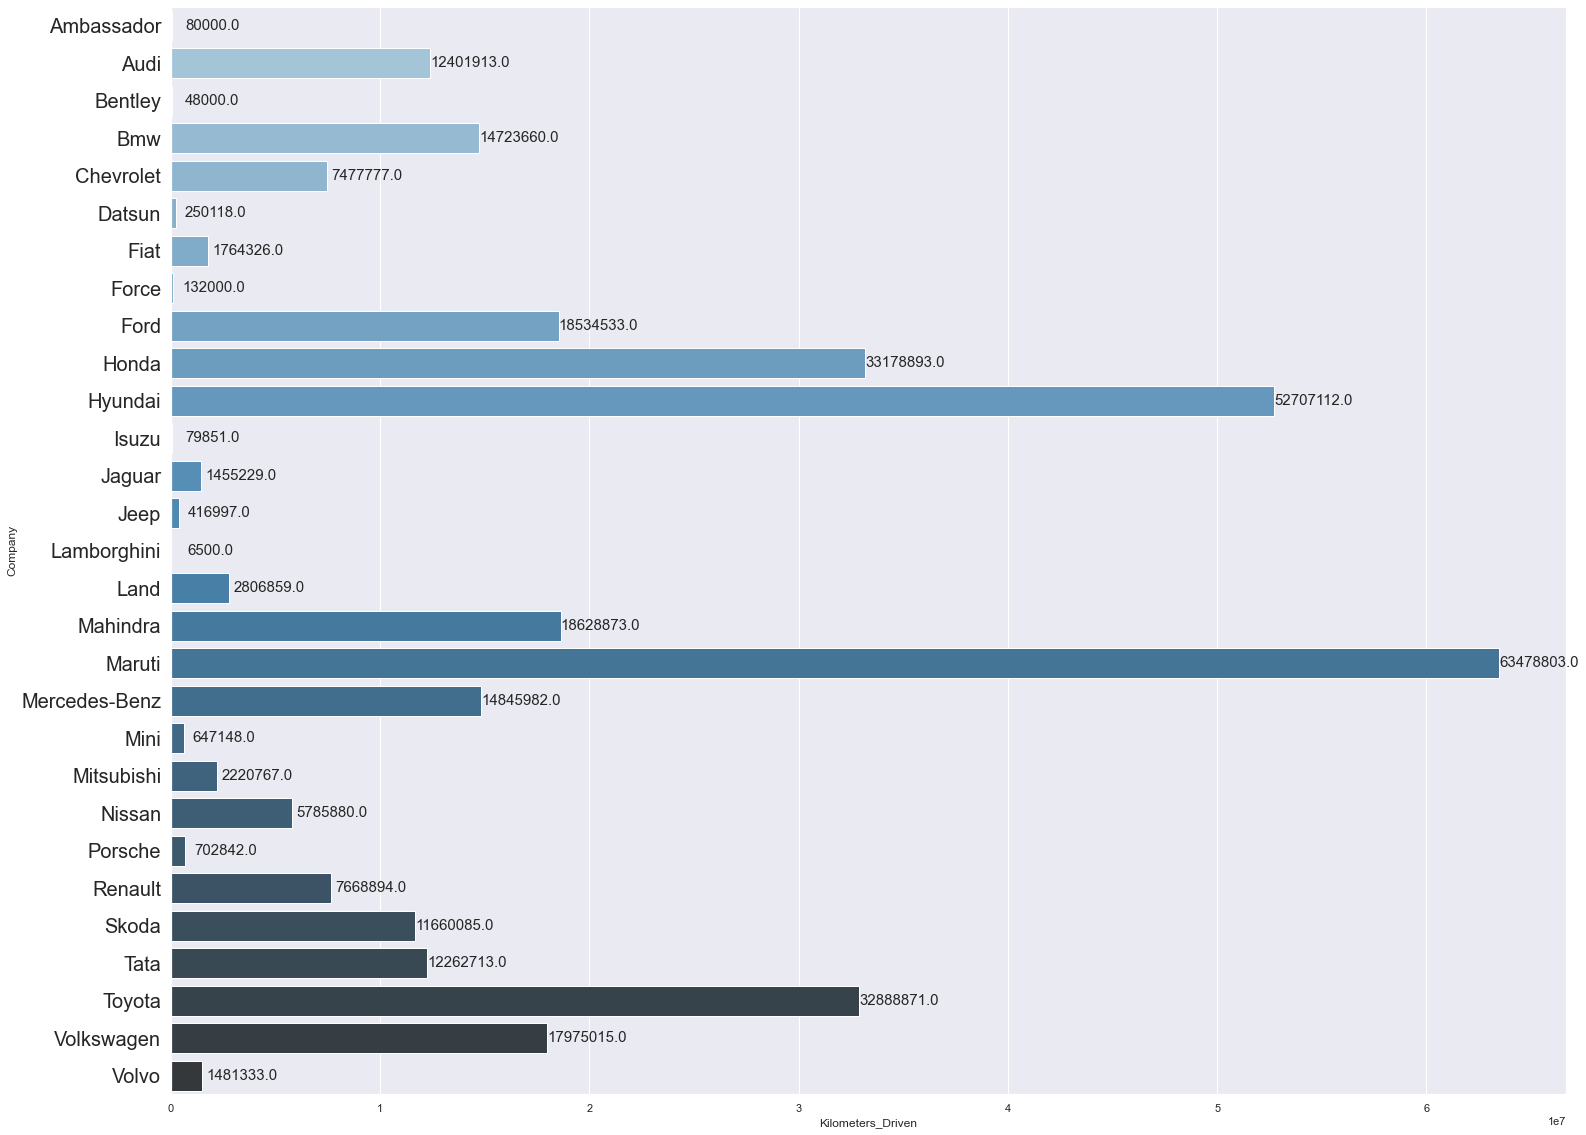

In [80]:
plt.figure(figsize=(25,20))
plt.yticks(fontsize=20)
px=sns.barplot(y=a['Company'],x=a['Kilometers_Driven'],palette='Blues_d')

for p in px.patches:
    label=p.get_width()
    x=p.get_y()+p.get_height()/2
    y=p.get_width()
    px.annotate(label,(y,x),ha='center',va='center',size=15,xytext=(40,0),textcoords='offset points')

plt.show()

In [81]:
a['Freq']=df['Company'].value_counts(sort=False).values

In [82]:
a['km/car']=np.round(a['Kilometers_Driven']/a['Freq'],0)

In [83]:
a.head()

,Company,Kilometers_Driven,Freq,km/car
0,Ambassador,80000,1,80000.0
1,Audi,12401913,234,53000.0
2,Bentley,48000,1,48000.0
3,Bmw,14723660,266,55352.0
4,Chevrolet,7477777,120,62315.0


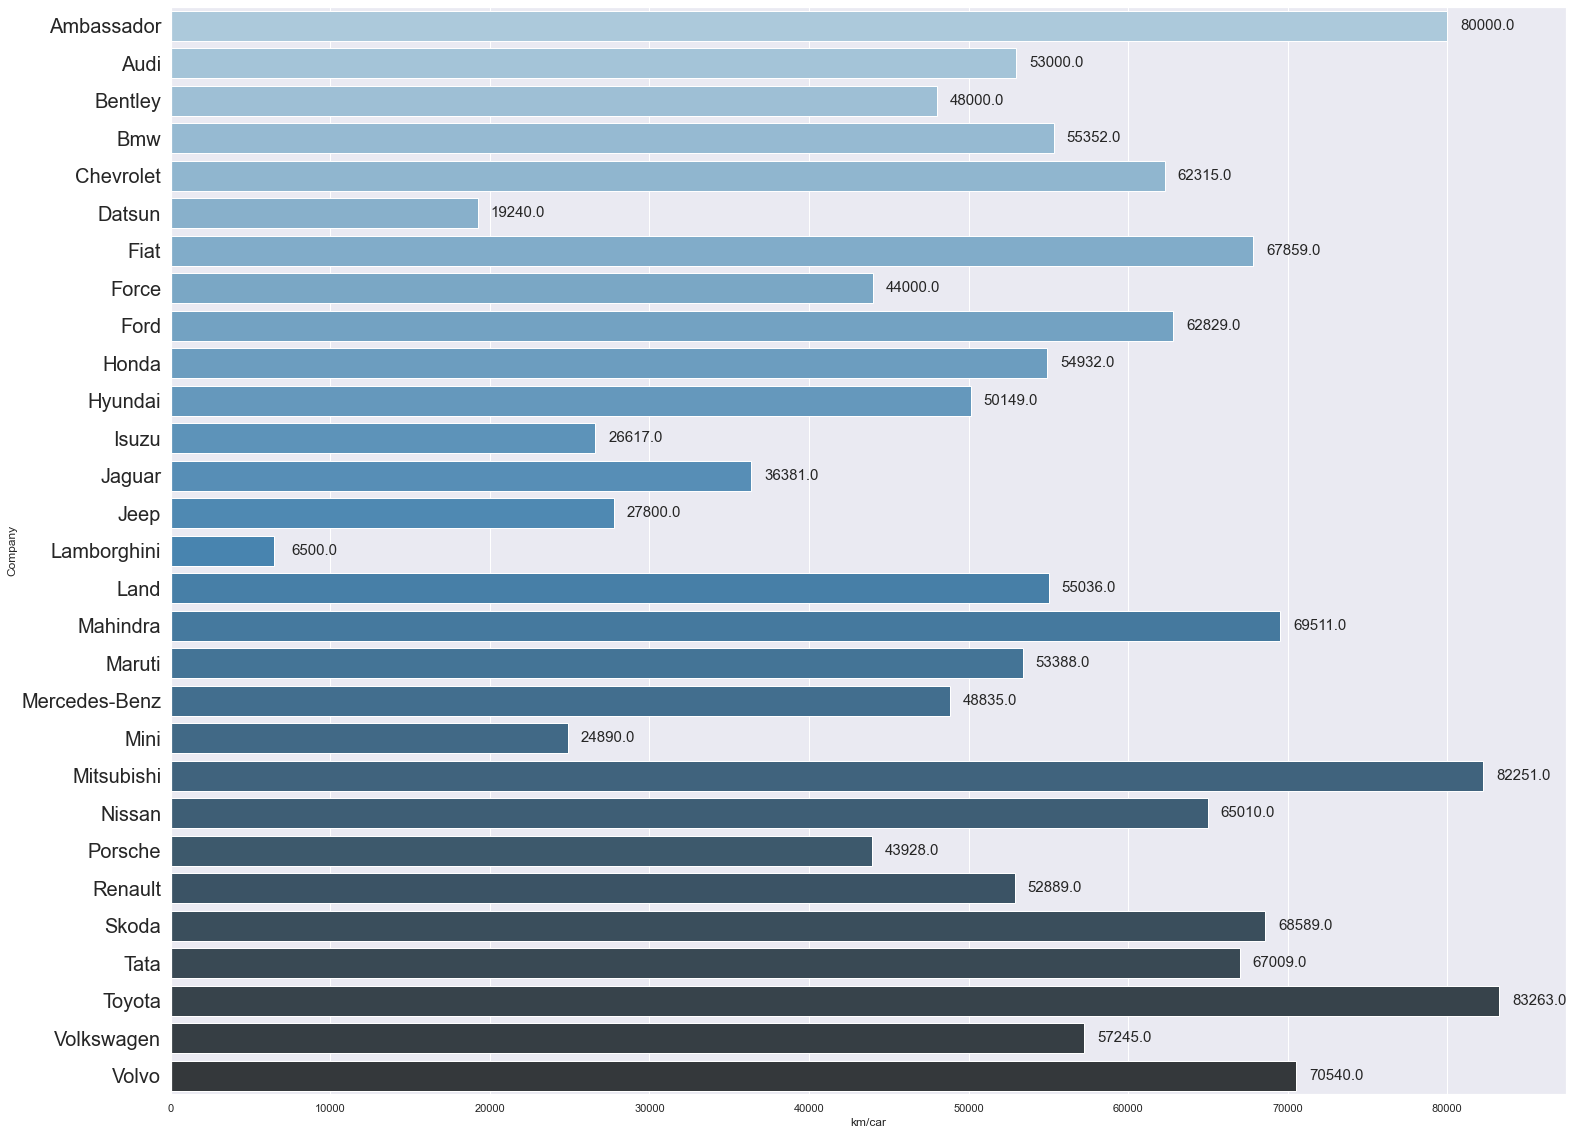

In [84]:
plt.figure(figsize=(25,20))
plt.yticks(fontsize=20)
px=sns.barplot(y=a['Company'],x=a['km/car'],palette='Blues_d')

for p in px.patches:
    label=p.get_width()
    x=p.get_y()+p.get_height()/2
    y=p.get_width()
    px.annotate(label,(y,x),ha='center',va='center',size=15,xytext=(40,0),textcoords='offset points')

plt.show()

### Bivariate Analysis

In [85]:
def scatplt(df,cl1,cl2,hue=None):
    plt.figure(figsize=(10,7))
    sns.scatterplot(data=df,x=cl1,y=cl2,hue=hue)
    plt.show()

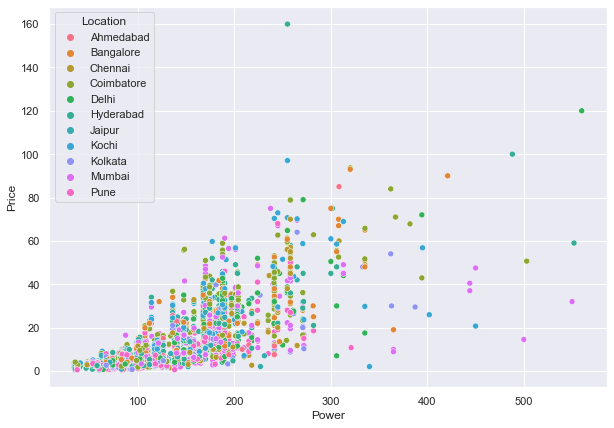

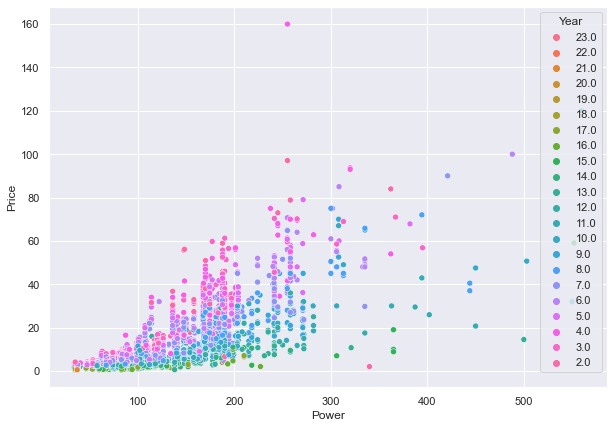

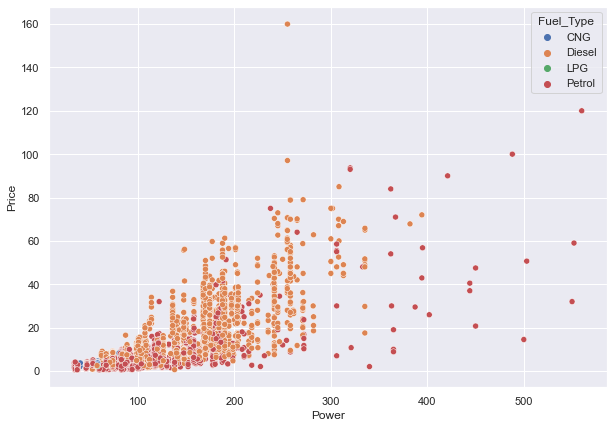

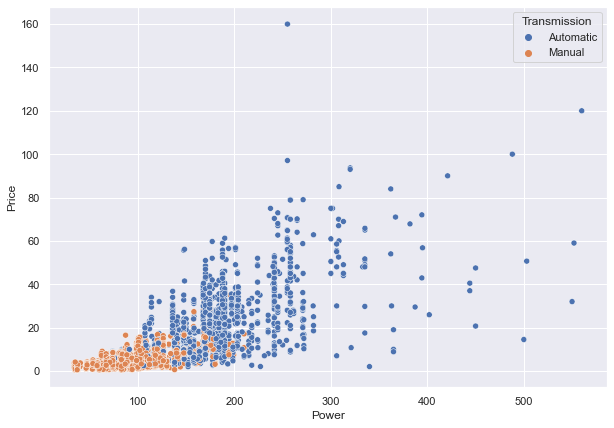

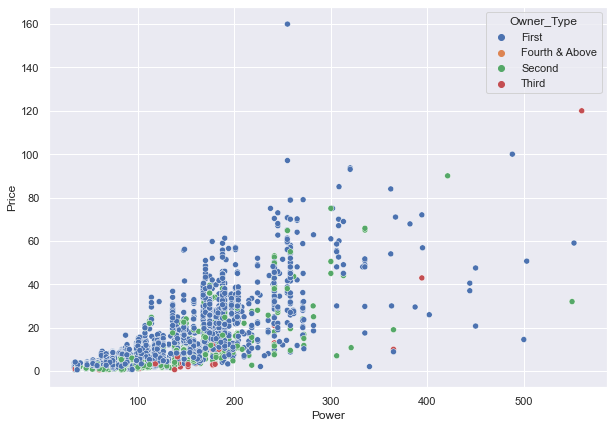

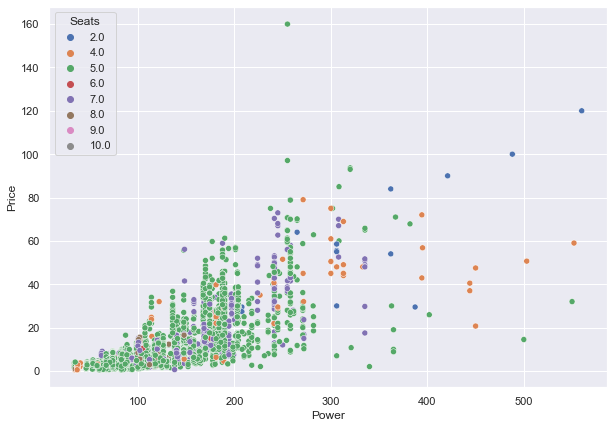

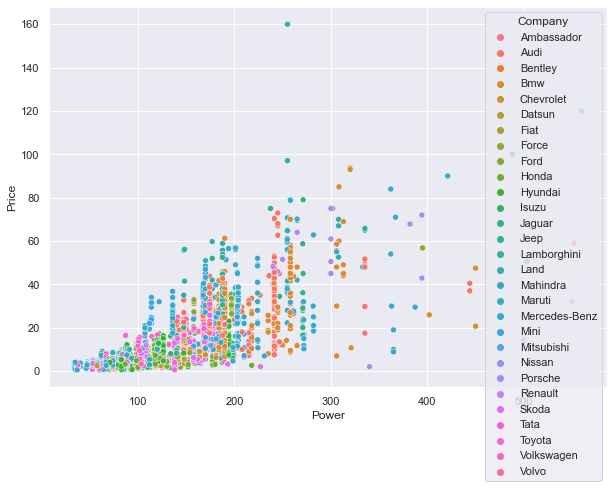

In [86]:
for i in col:
    scatplt(df,'Power','Price',hue=i)

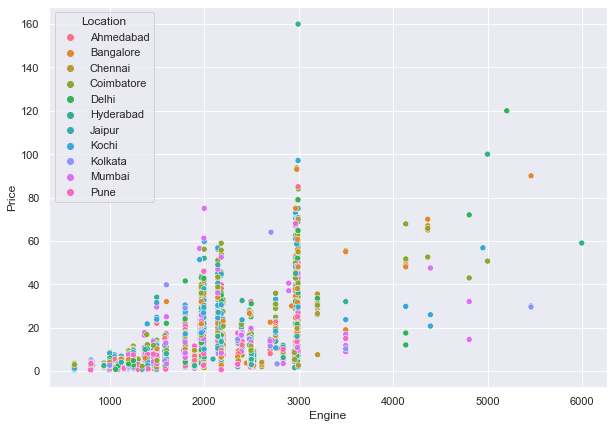

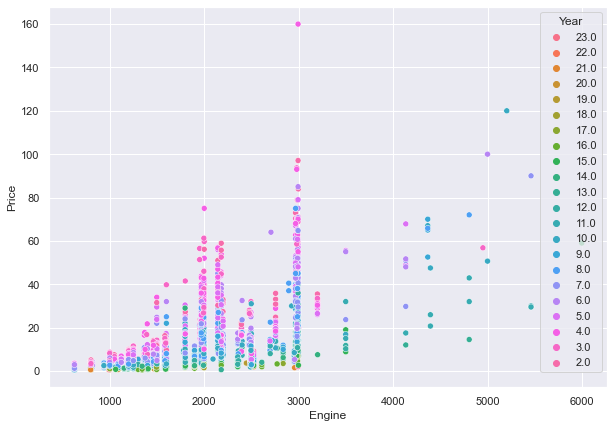

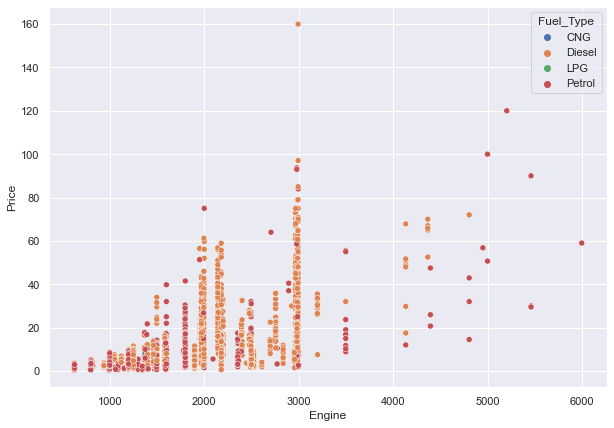

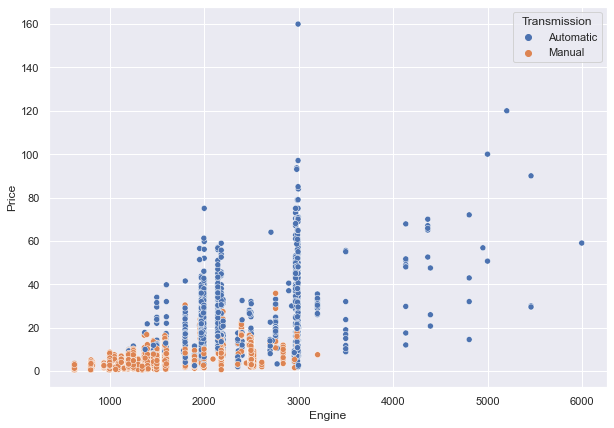

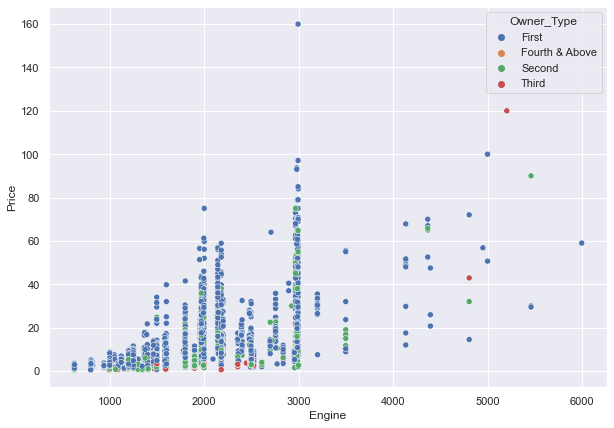

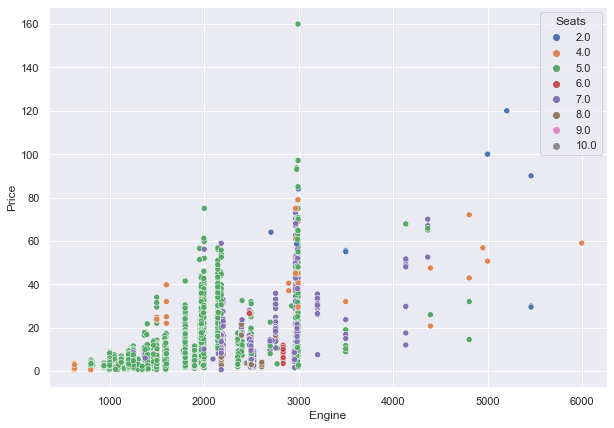

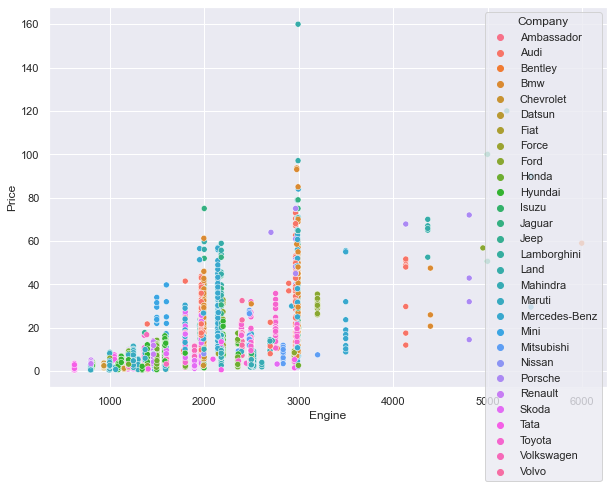

In [87]:
for i in col:
    scatplt(df,'Engine','Price',hue=i)

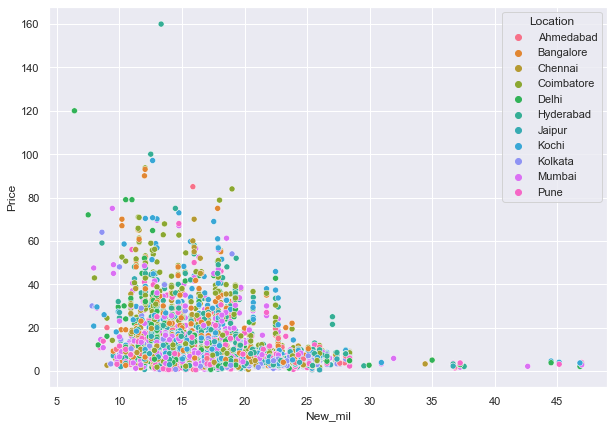

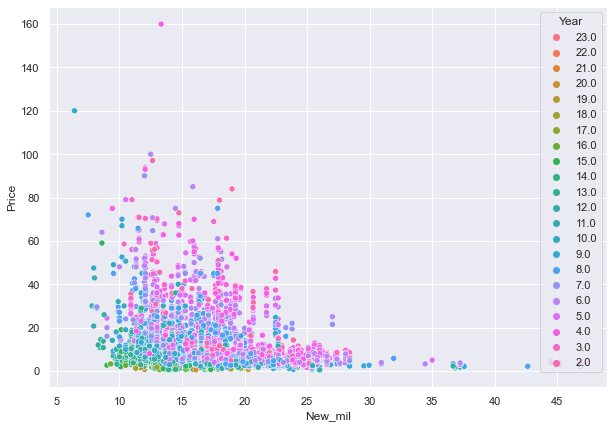

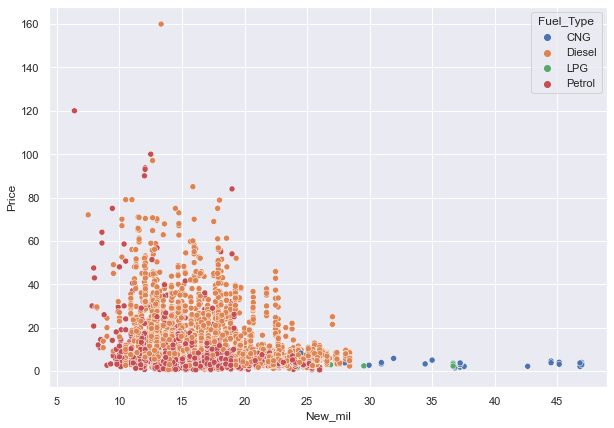

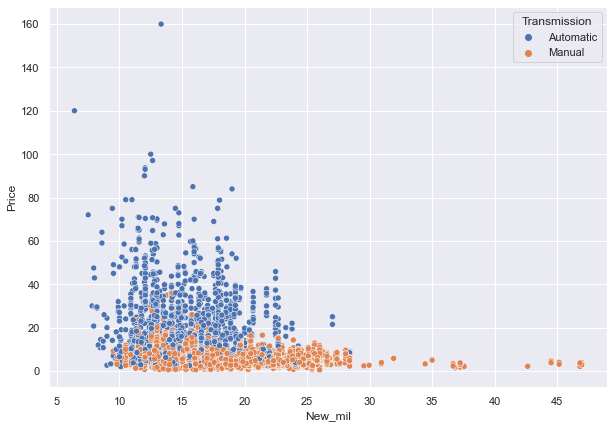

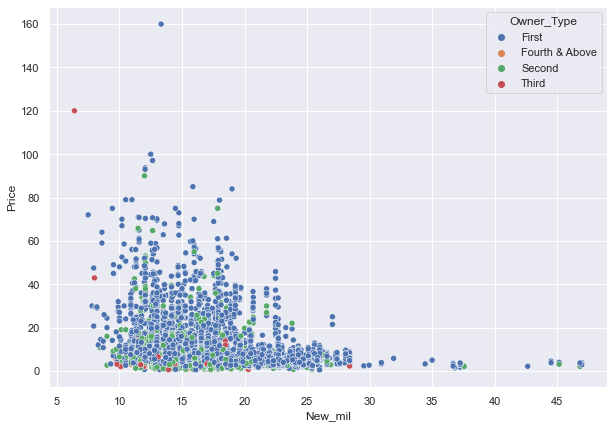

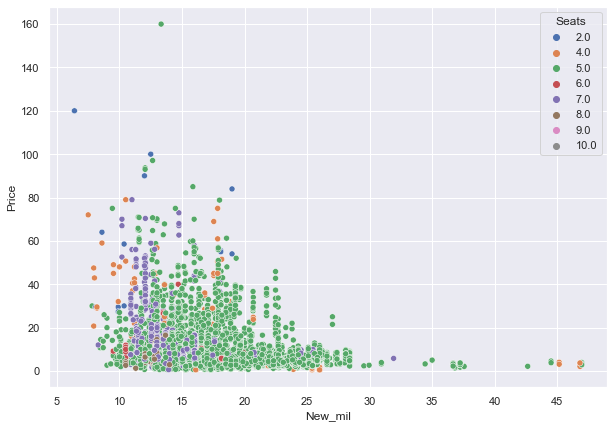

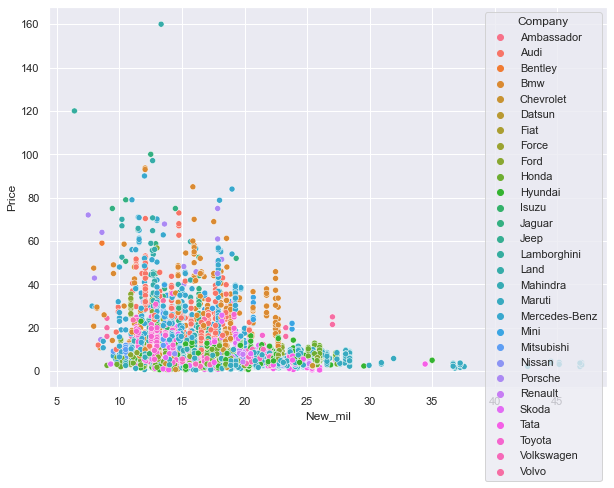

In [88]:
for i in col:
    scatplt(df,'New_mil','Price',hue=i)

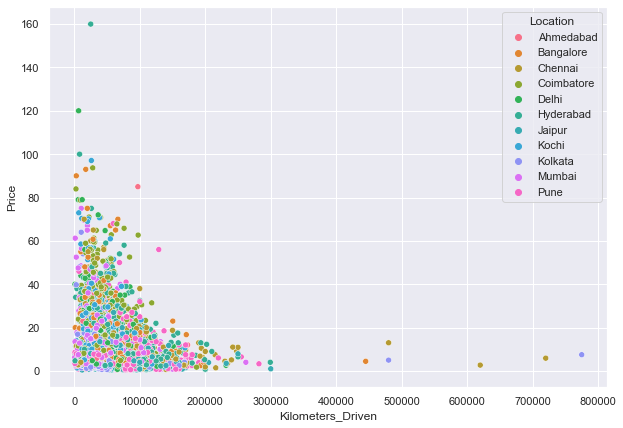

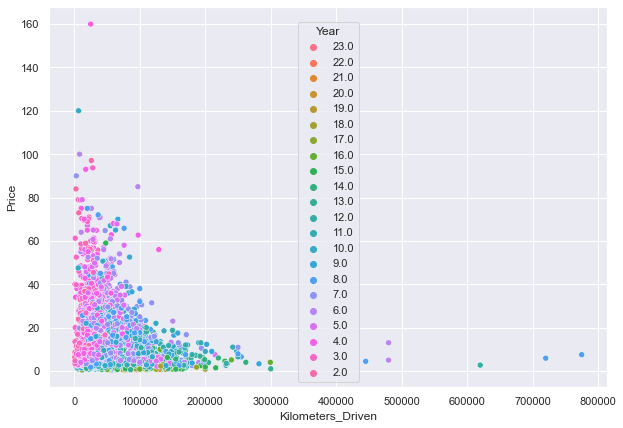

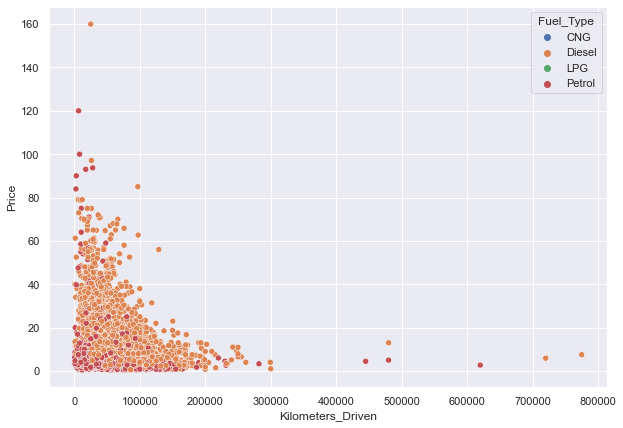

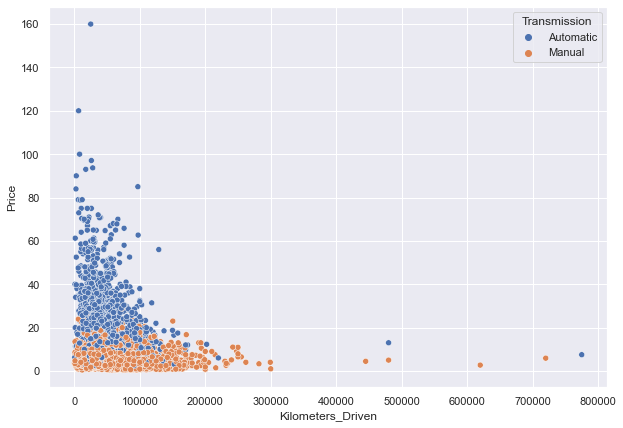

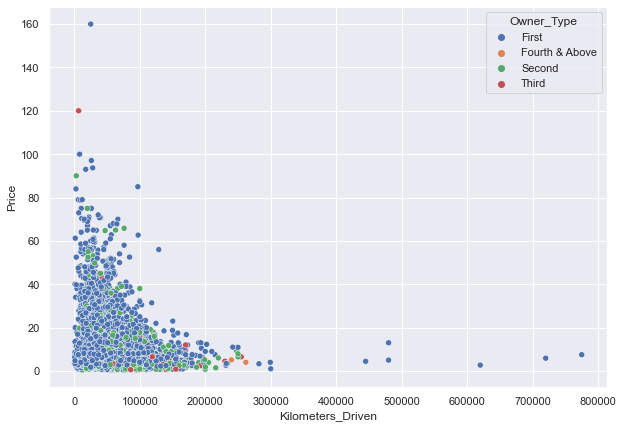

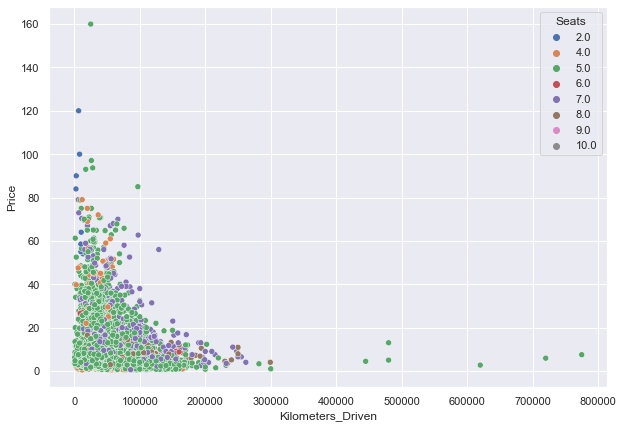

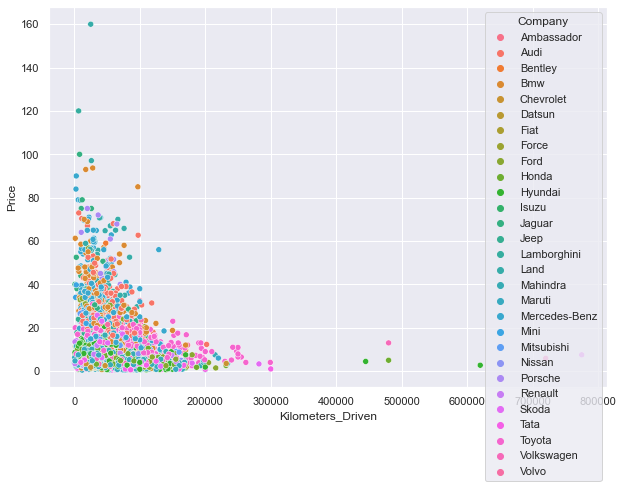

In [89]:
for i in col:
    scatplt(df,'Kilometers_Driven','Price',hue=i)

In [90]:
df.corr()

,Kilometers_Driven,Engine,Power,Price,New_mil
Kilometers_Driven,1.000000,0.162613,0.006029,-0.162094,-0.131388
Engine,0.162613,1.000000,0.866613,0.657177,-0.623388
Power,0.006029,0.866613,1.000000,0.774741,-0.534873
Price,-0.162094,0.657177,0.774741,1.000000,-0.324377
New_mil,-0.131388,-0.623388,-0.534873,-0.324377,1.000000


<AxesSubplot:>

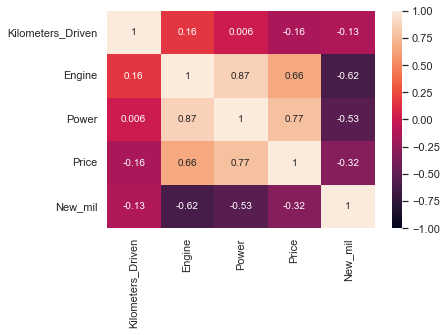

In [91]:
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True)

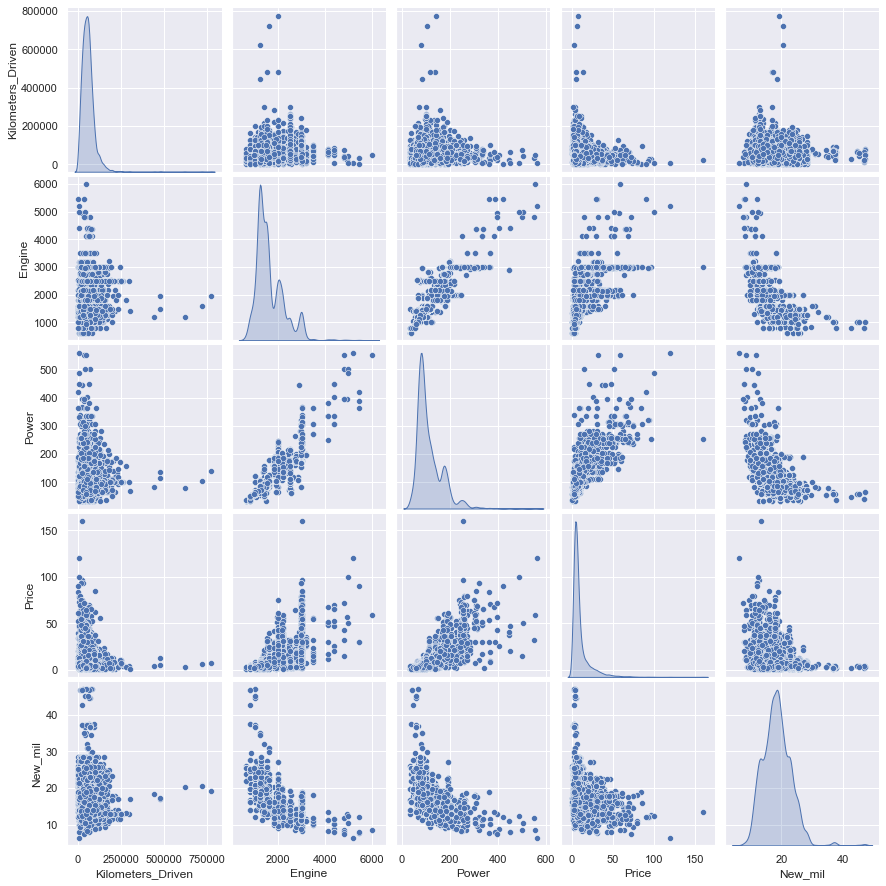

In [92]:
sns.pairplot(df,diag_kind='kde')

### Data Preparation

In [93]:
df=pd.get_dummies(df,columns=['Location','Fuel_Type','Transmission','Owner_Type','Seats','Company'],drop_first=True)

In [94]:
X=df.drop('Price',axis=1)
Y=df[['Price']]

### Model Building

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [96]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,shuffle=True,random_state=1)

In [97]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [98]:
lr.score(x_train,y_train)

0.7825382389735525

In [99]:
lr.coef_

array([[-9.20042065e-01, -1.90819951e-05,  1.48884018e-03,
         8.03717413e-02, -1.17685000e-01,  1.79799885e+00,
         1.67187636e+00,  1.98503551e+00, -7.08117576e-01,
         2.03995702e+00,  1.04286163e+00, -1.73288132e-01,
        -1.07711501e+00, -3.58484922e-01,  6.59107535e-01,
        -3.08190661e-01,  8.74684073e-01, -1.64306094e+00,
         1.02378465e-01,  1.01233430e+00, -6.69718439e-01,
         4.47828365e-01, -1.53354361e+01, -1.94629982e+01,
        -1.90340810e+01, -1.82936645e+01, -1.82657854e+01,
        -1.79571070e+01, -1.84848664e+01,  2.10726470e+00,
         2.94922253e+00,  1.06111205e+00, -8.03173459e+00,
        -9.29395291e+00, -8.30643341e+00, -1.09996333e+01,
        -7.03881579e+00, -7.99256377e+00, -7.38971004e+00,
        -8.39804838e+00,  9.19470095e+00, -6.39592905e+00,
         4.58021777e+01,  1.80587610e+01, -1.03646799e+01,
        -6.24062821e+00,  2.19734022e+00,  5.49018216e+00,
        -6.20977097e+00, -7.76566807e+00,  3.56030637e+0

In [100]:
lr.intercept_

array([33.4227106])

In [101]:
lr.rank_

57

In [102]:
lr.score(x_test,y_test)

0.7991234255407399

In [103]:
y_pred=lr.predict(x_test)

In [104]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
print('r2_score: ',r2_score(y_test,y_pred))
print('mean_absolute_error: ',mean_absolute_error(y_test,y_pred))
print('mean_squared_error: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('mean_absolute_percentage_error: ',mean_absolute_percentage_error(y_test,y_pred))

r2_score:  0.7991234255407399
mean_absolute_error:  2.8594842915935668
mean_squared_error:  5.016966736156745
mean_absolute_percentage_error:  0.5116790679897679


In [105]:
cof=lr.coef_.reshape(57,1)

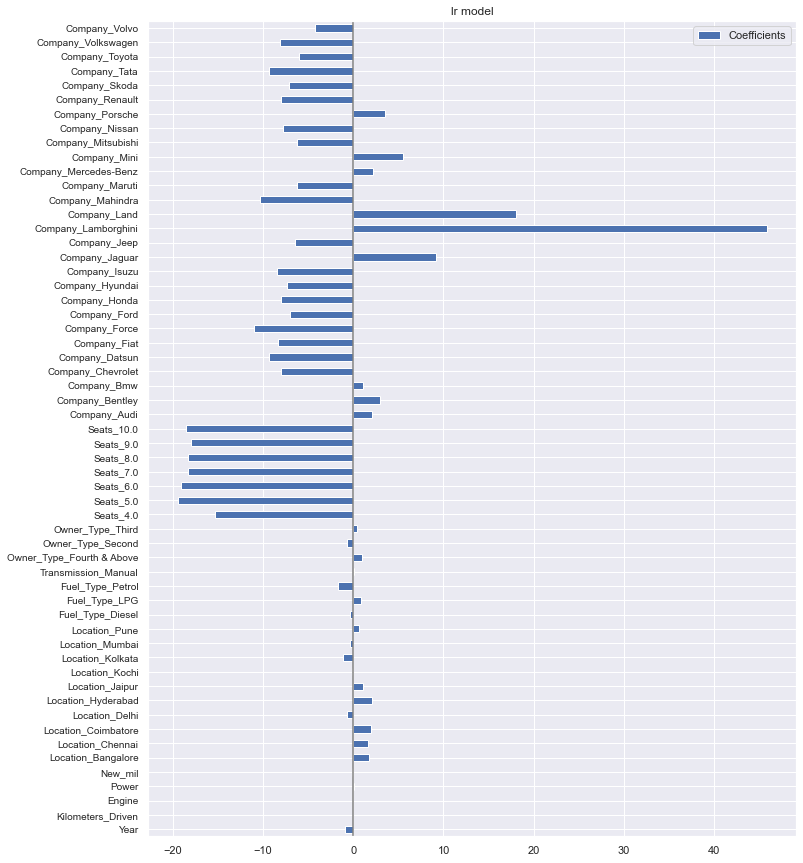

In [106]:
coefs = pd.DataFrame(
   cof,
   columns=['Coefficients'], index=x_train.columns
)

coefs.plot(kind='barh', figsize=(15, 15))
plt.title('lr model')
plt.yticks(size=10)
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

In [107]:
from sklearn.linear_model import Lasso

alpha=[0.005,0.01,0.05,0.1,0.2,0.5,1,2,3,5]
for i in alpha:
    ls=Lasso(alpha=i)
    ls.fit(x_train,y_train)
    print(i)
    print(ls.score(x_train,y_train))

0.005
0.777712859561105
0.01
0.7724430603333039
0.05
0.7441952031447155
0.1
0.7211727914016544
0.2
0.6932650416508854
0.5
0.6811782740342129
1
0.680229864381873
2
0.6768988030577583
3
0.6719295780901644
5
0.6560285306332592


In [108]:
from sklearn.linear_model import Ridge

alpha=[0.005,0.01,0.05,0.1,0.2,0.5,1,2,3,5]
for i in alpha:
    r=Ridge(alpha=i)
    r.fit(x_train,y_train)
    print(i)
    print(r.score(x_train,y_train))

0.005
0.7825379071873994
0.01
0.7825370173125084
0.05
0.7825157522235763
0.1
0.7824609818846255
0.2
0.7822832767727054
0.5
0.7814948219259021
1
0.780075657435832
2
0.7778016279532758
3
0.7761320728950624
5
0.7736638484699209


In [109]:
# As Engine and Power are highly correlated one of them can be dropped

df_wpow = df.copy(deep=True)
df_wpow.drop('Power',axis=1,inplace=True)

In [110]:
X1=X.drop('Power',axis=1)

In [111]:
x_tr,x_te,y_tr,y_te=train_test_split(X1,Y,test_size=0.3,shuffle=True,random_state=1)

In [112]:
lr.fit(x_tr,y_tr)
lr.score(x_tr,y_tr)

0.768656489323631

In [113]:
lr.score(x_te,y_te)

0.7858992562028038

In [114]:
X2=X.drop('Engine',axis=1)

In [115]:
x_tr2,x_te2,y_tr2,y_te2=train_test_split(X2,Y,test_size=0.3,shuffle=True,random_state=1)

In [116]:
lr.fit(x_tr2,y_tr2)
print(lr.score(x_tr2,y_tr2))
print(lr.score(x_te2,y_te2))

0.7820211848812011
0.799131025702046


In [117]:
y_pred2=lr.predict(x_te2)
Adj_r2 = 1 - (1-r2_score(y_te2, y_pred2)) * (len(Y)-1)/(len(Y)-X2.shape[1]-1)
Adj_r2

0.797196271219644

In [118]:
X3=X2.drop('New_mil',axis=1)

In [119]:
x_tr3,x_te3,y_tr3,y_te3=train_test_split(X3,Y,test_size=0.3,shuffle=True,random_state=1)

In [120]:
lr.fit(x_tr3,y_tr3)
print(lr.score(x_tr3,y_tr3))
print(lr.score(x_te3,y_te3))

0.7810484807318667
0.7986856638499914


In [121]:
y_pred3=lr.predict(x_te3)
Adj_r2 = 1 - (1-r2_score(y_te3, y_pred3)) * (len(Y)-1)/(len(Y)-X3.shape[1]-1)
Adj_r2

0.7967815729663714

In [122]:
print('mean_absolute_error: ',mean_absolute_error(y_te3,y_pred3))
print('mean_suare_error: ',np.sqrt(mean_squared_error(y_te3,y_pred3)))
print('mean_absolute_percentage_error: ',mean_absolute_percentage_error(y_te3,y_pred3))

mean_absolute_error:  2.871438331939027
mean_suare_error:  5.022430391160222
mean_absolute_percentage_error:  0.5129515360657688


* As the adjusted R2 score is higher with both Engine and New_mil dropped we can proceed further with dropping the two colomns because they can become redundant

In [123]:
df.head()

,Year,Kilometers_Driven,Engine,Power,Price,New_mil,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0,Company_Audi,Company_Bentley,Company_Bmw,Company_Chevrolet,Company_Datsun,Company_Fiat,Company_Force,Company_Ford,Company_Honda,Company_Hyundai,Company_Isuzu,Company_Jaguar,Company_Jeep,Company_Lamborghini,Company_Land,Company_Mahindra,Company_Maruti,Company_Mercedes-Benz,Company_Mini,Company_Mitsubishi,Company_Nissan,Company_Porsche,Company_Renault,Company_Skoda,Company_Tata,Company_Toyota,Company_Volkswagen,Company_Volvo
0,11.0,72000,998.0,58.16,1.75,37.24,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,6.0,41000,1582.0,126.20,12.50,19.67,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10.0,46000,1199.0,88.70,4.50,18.20,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9.0,87000,1248.0,88.76,6.00,20.77,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,8.0,40670,1968.0,140.80,17.74,15.20,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [124]:
Xn=df.drop('Price',axis=1)
Yn=df[['Price']]

In [125]:
xn_tr,xn_te,yn_tr,yn_te=train_test_split(Xn,Yn,test_size=0.3,shuffle=True,random_state=1)

In [126]:
lr.fit(xn_tr,yn_tr)
print(lr.score(xn_tr,yn_tr))
print(lr.score(xn_te,yn_te))

0.7825382389735525
0.7991234255407399


### Checking the model by tranforming skewed columns

<AxesSubplot:xlabel='Kilometers_Driven', ylabel='Count'>

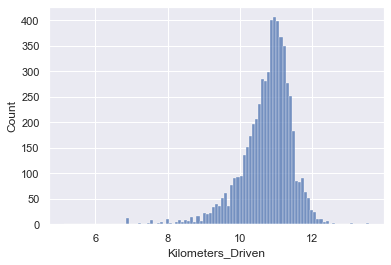

In [127]:
sns.histplot(np.log(df['Kilometers_Driven']))

<AxesSubplot:xlabel='Price', ylabel='Count'>

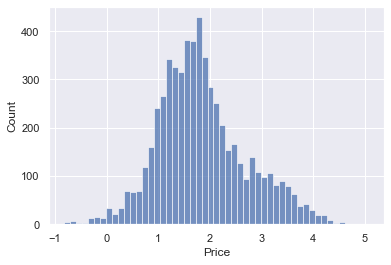

In [128]:
sns.histplot(np.log(df['Price']))

In [129]:
Xn['Kilometers_Driven']=np.log(Xn['Kilometers_Driven'])
Yn['Price']=np.log(Yn['Price'])

In [130]:
xn_tr,xn_te,yn_tr,yn_te=train_test_split(Xn,Yn,test_size=0.3,shuffle=True,random_state=1)

In [131]:
lr.fit(xn_tr,yn_tr)
print('train_score: ',lr.score(xn_tr,yn_tr))
print('test_score: ',lr.score(xn_te,yn_te))

train_score:  0.9279687583836171
test_score:  0.9254854171135289


In [133]:
y_pre=lr.predict(xn_te)
print('r2_score: ',r2_score(yn_te,y_pre))
print('mean_absolute_error: ',mean_absolute_error(yn_te,y_pre))
print('mean_squared_error: ',np.sqrt(mean_squared_error(yn_te,y_pre)))

r2_score:  0.9254854171135289
mean_absolute_error:  0.17805178275708616
mean_squared_error:  0.23551628634942795
